In [1]:
import rpy2
%load_ext rpy2.ipython

In [98]:
import pandas as pd
from __future__ import division
import math
import datetime
import numpy as np
import scipy as sc
import pylab as pl
import matplotlib as mpl

import os
import xlrd
import xlsxwriter


import scipy.stats
%matplotlib inline


In [99]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


In [100]:
mpl.pyplot.style.use('ggplot')
mpl.rcParams['font.family'] = ['Bitstream Vera Sans']

In [101]:
# Fill in the study name
StudyName = '2STRNS'

In [102]:
# in order to load all the filenames in a list: "ls -1 > filenames.txt" in ubuntu bash
# use this in cleand_data!

filenames = pd.read_csv('/home/albert/Doctoral_project/StroopExperiment/cleaned_data/filenames.txt', sep=" ", header = None)
filenames.columns=['FileNames']
filenames.head()
#filenames.select_dtypes(include=['object']).apply(str())
filenames.head()
filenames.astype('S32')
FileNameList = []
for i in range (0,len(filenames)): 
  if 'csv' in filenames.FileNames[i]:
    FileNameList.append(filenames.FileNames[i])

Pilotstudies = 2
NumberofParticipantsintotal = 16
Numberofsesssionsperparticipant = 4 
    
    
    
len(FileNameList) == NumberofParticipantsintotal *  Numberofsesssionsperparticipant


True

In [103]:
chunks = []

# Essentially every single df which is read from the csv files is being appended
#to the chunks list which in the next cell is being put into one big dataframe

for i in range(0,len(FileNameList)):
  if StudyName in FileNameList[i]:
      df = pd.read_csv('/home/albert/Doctoral_project/StroopExperiment/cleaned_data/'+FileNameList[i] 
               
                 ,parse_dates={'datetime':[1,2]}, error_bad_lines=False)
      df.columns = ['corrAns+Color','TrialType','Signal','RowNum','Word','NofPractice','delete','NofPractice2','delete2',
              'delete3','delete4','delete5','delete6','delete7','NofTrial','NofTrial2','NofTrial3','Response','Trial_correct',
              'RT','date','FrameRate','ExpName','session','participant','delete8']
      df = df.iloc[:, [1,3,5,14,17,18,19,20,23,24]]


      FirstFix = df[df.TrialType == 'fix'].index.tolist()
      FirstFix = int(FirstFix[0])

      a = [x*2 for x in range(0,int(FirstFix/2))]
      b = [x for x in range(FirstFix,int(FirstFix+307))]
      c= a+b # cut out the unnecessary rows but include the training data
      c = b # cut out everything but the 306 trials of main experiment    
      df = df.iloc[c,:]
      chunks.append(df)




# DataFrame now holds all data 
DataFrameComplete  = pd.concat(chunks, ignore_index=True)
print(DataFrameComplete.head())
DataFrameComplete.tail()

  TrialType  RowNum  NofPractice  NofTrial Response  Trial_correct  RT  \
0       fix    21.0          NaN       0.0     None            0.0 NaN   
1       fix    21.0          NaN       1.0     None            0.0 NaN   
2       fix    21.0          NaN       2.0     None            0.0 NaN   
3       fix    21.0          NaN       3.0     None            0.0 NaN   
4       fix    21.0          NaN       4.0     None            0.0 NaN   

               date session participant  
0  2017_Mai_11_1720     A-1    2STRNS-1  
1  2017_Mai_11_1720     A-1    2STRNS-1  
2  2017_Mai_11_1720     A-1    2STRNS-1  
3  2017_Mai_11_1720     A-1    2STRNS-1  
4  2017_Mai_11_1720     A-1    2STRNS-1  


TrialType  RowNum  NofPractice  NofTrial Response  Trial_correct  RT  \
9819       fix    21.0          NaN     302.0     None            0.0 NaN   
9820       fix    21.0          NaN     303.0     None            0.0 NaN   
9821       fix    21.0          NaN     304.0     None            0.0 NaN   
9822       fix    21.0          NaN     305.0     None            0.0 NaN   
9823       fix    22.0          NaN     306.0     None            0.0 NaN   

                  date session participant  
9819  2017_Mai_31_1228     B-2    2STRNS-9  
9820  2017_Mai_31_1228     B-2    2STRNS-9  
9821  2017_Mai_31_1228     B-2    2STRNS-9  
9822  2017_Mai_31_1228     B-2    2STRNS-9  
9823  2017_Mai_31_1228     B-2    2STRNS-9

In [104]:
#renaming the  participants and cleaning the CSVs

# Fill in the study name
if StudyName == '1STACS':

  DataFrameComplete.loc[DataFrameComplete.date == '2017_Mai_30_1336', 'participant'] = '1STACS-7'
  DataFrameComplete.loc[DataFrameComplete.date == '2017_Mai_15_1452', 'session'] = 'A-1'
  DataFrameComplete.loc[DataFrameComplete.date == '2017_Mai_30_1737', 'session'] = 'B-2'
  DataFrameComplete.loc[DataFrameComplete.date == '2017_Mai_30_1609', 'participant'] = '1STACS-8'

elif StudyName == '2STRNS':

  DataFrameComplete.loc[DataFrameComplete.date == '2017_Apr_20_0939', 'session'] = 'B-1'
  DataFrameComplete.loc[DataFrameComplete.date == '2017_Apr_20_0939', 'participant'] = '2STRNS-1'
  DataFrameComplete.loc[DataFrameComplete.date == '2017_Apr_27_1306', 'participant'] = '2STRNS-3'
  DataFrameComplete.loc[DataFrameComplete.date == '2017_Apr_26_1603', 'participant'] = '2STRNS-7'
  DataFrameComplete.loc[DataFrameComplete.date == '2017_Mai_18_1812', 'participant'] = '2STRNS-8'




# takes a look at the cleaned data

DataFrameComplete.loc[(DataFrameComplete.TrialType == 'fix') & (DataFrameComplete.NofTrial == 0.0)]


TrialType  RowNum  NofPractice  NofTrial Response  Trial_correct  RT  \
0          fix    21.0          NaN       0.0     None            0.0 NaN   
307        fix    21.0          NaN       0.0     None            0.0 NaN   
614        fix    21.0          NaN       0.0     None            0.0 NaN   
921        fix    21.0          NaN       0.0     None            0.0 NaN   
1228       fix    21.0          NaN       0.0     None            0.0 NaN   
1535       fix    21.0          NaN       0.0     None            0.0 NaN   
1842       fix    21.0          NaN       0.0     None            0.0 NaN   
2149       fix    21.0          NaN       0.0     None            0.0 NaN   
2456       fix    21.0          NaN       0.0     None            0.0 NaN   
2763       fix    21.0          NaN       0.0     None            0.0 NaN   
3070       fix    21.0          NaN       0.0     None            0.0 NaN   
3377       fix    21.0          NaN       0.0     None            0.0 NaN   
3684       fix    21.0          NaN       0.0     None            0.0 NaN   
3991       fix    21.0          NaN       0.0     None            0.0 NaN   
4298       fix    21.0          NaN       0.0     None            0.0 NaN   
4605       fix    21.0          NaN       0.0     None            0.0 NaN   
4912       fix    21.0          NaN       0.0     None            0.0 NaN   
5219       fix    21.0          NaN       0.0     None            0.0 NaN   
5526       fix    21.0          NaN       0.0     None            0.0 NaN   
5833       fix    21.0          NaN       0.0     None            0.0 NaN   
6140       fix    21.0          NaN       0.0     None            0.0 NaN   
6447       fix    21.0          NaN       0.0     None            0.0 NaN   
6754       fix    21.0          NaN       0.0     None            0.0 NaN   
7061       fix    21.0          NaN       0.0     None            0.0 NaN   
7368       fix    21.0          NaN       0.0     None            0.0 NaN   
7675       fix    21.0          NaN       0.0     None            0.0 NaN   
7982       fix    21.0          NaN       0.0     None            0.0 NaN   
8289       fix    21.0          NaN       0.0     None            0.0 NaN   
8596       fix    21.0          NaN       0.0     None            0.0 NaN   
8903       fix    21.0          NaN       0.0     None            0.0 NaN   
9210       fix    21.0          NaN       0.0     None            0.0 NaN   
9517       fix    21.0          NaN       0.0     None            0.0 NaN   

                  date session participant  
0     2017_Mai_11_1720     A-1    2STRNS-1  
307   2017_Mai_12_1643     A-2    2STRNS-1  
614   2017_Apr_20_0939     B-1    2STRNS-1  
921   2017_Apr_21_0912     B-2    2STRNS-1  
1228  2017_Apr_27_1306     A-1    2STRNS-3  
1535  2017_Apr_28_1426     A-2    2STRNS-3  
1842  2017_Apr_24_1426     B-1    2STRNS-3  
2149  2017_Apr_25_1418     B-2    2STRNS-3  
2456  2017_Apr_27_1235     A-1    2STRNS-4  
2763  2017_Apr_28_1213     A-2    2STRNS-4  
3070  2017_Apr_24_1610     B-1    2STRNS-4  
3377  2017_Apr_25_1609     B-2    2STRNS-4  
3684  2017_Apr_25_1018     A-1    2STRNS-5  
3991  2017_Apr_26_1009     A-2    2STRNS-5  
4298  2017_Apr_27_1029     B-1    2STRNS-5  
4605  2017_Apr_28_1010     B-2    2STRNS-5  
4912  2017_Apr_26_1509     A-1    2STRNS-6  
5219  2017_Apr_27_1620     A-2    2STRNS-6  
5526  2017_Mai_19_1518     B-1    2STRNS-6  
5833  2017_Mai_20_1319     B-2    2STRNS-6  
6140  2017_Apr_26_1603     A-1    2STRNS-7  
6447  2017_Apr_27_1541     A-2    2STRNS-7  
6754  2017_Mai_16_1715     B-1    2STRNS-7  
7061  2017_Mai_17_1715     B-2    2STRNS-7  
7368  2017_Mai_18_1812     A-1    2STRNS-8  
7675  2017_Mai_19_1718     A-2    2STRNS-8  
7982  2017_Mai_15_1220     B-1    2STRNS-8  
8289  2017_Mai_16_1204     B-2    2STRNS-8  
8596  2017_Mai_16_1410     A-1    2STRNS-9  
8903  2017_Mai_17_1237     A-2    2STRNS-9  
9210  2017_Mai_30_1528     B-1    2STRNS-9  
9517  2017_Mai_31_1228 

In [105]:
print(DataFrameComplete.dtypes)
DataFrameComplete.columns


TrialType         object
RowNum           float64
NofPractice      float64
NofTrial         float64
Response          object
Trial_correct    float64
RT               float64
date              object
session           object
participant       object
dtype: object


Index(['TrialType', 'RowNum', 'NofPractice', 'NofTrial', 'Response',
       'Trial_correct', 'RT', 'date', 'session', 'participant'],
      dtype='object')

In [106]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn.apionly as sns
% matplotlib inline
import importlib
import seaborn
importlib.reload(seaborn);
DataFrameComplete.head()

TrialType  RowNum  NofPractice  NofTrial Response  Trial_correct  RT  \
0       fix    21.0          NaN       0.0     None            0.0 NaN   
1       fix    21.0          NaN       1.0     None            0.0 NaN   
2       fix    21.0          NaN       2.0     None            0.0 NaN   
3       fix    21.0          NaN       3.0     None            0.0 NaN   
4       fix    21.0          NaN       4.0     None            0.0 NaN   

               date session participant  
0  2017_Mai_11_1720     A-1    2STRNS-1  
1  2017_Mai_11_1720     A-1    2STRNS-1  
2  2017_Mai_11_1720     A-1    2STRNS-1  
3  2017_Mai_11_1720     A-1    2STRNS-1  
4  2017_Mai_11_1720     A-1    2STRNS-1

In [107]:


# calculate how many blocks are in the complete dataframe
NumberOfSessions = len(DataFrameComplete) / (307)
NumberofBlocks = NumberOfSessions * (7+6*3)


ListofBlocks = []
NrSessionsCounted = 0




# calculate how long the blocks are (fixation 13, rest 12)
for i in range(0,int(NumberofBlocks)):
    Ausgleichsfaktor = 0
    if ((i -  (int (i / 25) * 25 )) % 4 == 0): # Fixblocks are 0 4 8 ....24  25 29
      Ausgleichsfaktor = 1
      #print(i)
    if (i  % 25 == 0):
      NrSessionsCounted += 1
      Ausgleichsfaktor = 1
    for j in range(0,12 + Ausgleichsfaktor):       
      ListofBlocks.append(i)


df_to_add = pd.DataFrame(ListofBlocks, columns = ['ExperimentalBlocks'])

print((len(ListofBlocks)) == (len(df_to_add)) == (len(DataFrameComplete)))

if 'ExperimentalBlocks' not in DataFrameComplete.columns:
  DataFrameComplete = pd.concat([DataFrameComplete, df_to_add], axis=1)

#DataFrameComplete.ExperimentalBlocks == df_to_add.ExperimentalBlocks



# Tests if any of the Blocks was assigned a wrong number of trials
for i in range(0,int(NumberofBlocks)):
    if  i % 25 == 0:
      if ListofBlocks.count(i) != 13:
        print('Fehler')
        
        
    if ((i -  (int (i / 25) * 25 )) % 4 == 0):
      if ListofBlocks.count(i) != 13:
        print('Fehler')

    if ((i -  (int (i / 25) * 25 )) % 4 != 0) and (i % 25 != 0):
      if ListofBlocks.count(i) != 12:
        print('Fehler')


True


In [108]:
my_dict = {}
for x in range(0,int(NumberofBlocks)):
  my_dict[x] = []

my_dict
DataFrameComplete.head()

for i in range(0,len(DataFrameComplete)):
    
  if DataFrameComplete.iloc[i,0] == 'fix':
    my_dict[DataFrameComplete.iloc[i,10]] = 'Fix_Block' 

  elif DataFrameComplete.iloc[i,0] == 'congruent':
    my_dict[DataFrameComplete.iloc[i,10]] = 'Congruent_Block' 
    
  elif DataFrameComplete.iloc[i,0] == 'incongruent':
    my_dict[DataFrameComplete.iloc[i,10]] = 'Incongruent_Block' 

  elif DataFrameComplete.iloc[i,0] == 'neutralofneutral':
    my_dict[DataFrameComplete.iloc[i,10]] = 'Neutral_Block' 


In [109]:
DataFrameComplete = DataFrameComplete.assign(Category_of_Trial= 'undefined')

for i in range(0,int(NumberofBlocks)):
    DataFrameComplete.loc[DataFrameComplete.ExperimentalBlocks == i, 'Category_of_Trial'] = my_dict[i]


'undefined' not in DataFrameComplete.Category_of_Trial


True

In [110]:
# order the TrialTypes

DataFrameComplete.loc[(DataFrameComplete.Category_of_Trial == 'Congruent_Block') 
                      & (DataFrameComplete.TrialType == 'neutral'), 'TrialType' ] = 'Neutral_of_congruent'

DataFrameComplete.loc[(DataFrameComplete.Category_of_Trial == 'Incongruent_Block') 
                      & (DataFrameComplete.TrialType == 'neutral'), 'TrialType' ] = 'Neutral_of_incongruent'

DataFrameComplete.loc[(DataFrameComplete.Category_of_Trial == 'Neutral_Block') 
                      & (DataFrameComplete.TrialType == 'neutral'), 'TrialType' ] = 'Neutral_of_neutral'

DataFrameComplete.loc[(DataFrameComplete.Category_of_Trial == 'Neutral_Block') 
                      & (DataFrameComplete.TrialType == 'neutralofneutral'), 'TrialType' ] = 'neutral'


#DataFrameComplete.loc[DataFrameComplete.Category_of_Trial == 'Congruent_Block']

#DataFrameComplete.loc[DataFrameComplete.Category_of_Trial == 'Congruent_Block']


#Incongruent_Block
#Neutral_Block
DataFrameComplete.iloc[450:504,:]


# this is the test if I assigned all the trials correctly
# all trials should appear as often as the others, just fix trials should appear 2.5277777 
# as often as the other trial types

ratio  = DataFrameComplete['TrialType'].value_counts()
print(2.52< ratio[0] / ratio [1] < 2.53)
print (ratio)

True
fix                       2912
congruent                 1152
incongruent               1152
Neutral_of_incongruent    1152
Neutral_of_congruent      1152
Neutral_of_neutral        1152
neutral                   1152
Name: TrialType, dtype: int64


In [111]:
# order the trials into high-conflict, low-conflict trials
DataFrameComplete = DataFrameComplete.assign(ConflictLevel = 'undefined')

#Sorting into High-High-ConflictTrials
DataFrameComplete.loc[(DataFrameComplete.TrialType.shift(1) == 'incongruent')  &
                      (DataFrameComplete.TrialType.shift(0) == 'incongruent'), 'ConflictLevel'] = 'HH'

#Sorting into High-Low-ConflictTrials
DataFrameComplete.loc[(DataFrameComplete.TrialType.shift(1) == 'incongruent') &
                      (DataFrameComplete.TrialType.shift(0) != 'incongruent'), 'ConflictLevel'] = 'HL'

#Sorting into Low-High-ConflictTrials
DataFrameComplete.loc[(DataFrameComplete.TrialType.shift(1) != 'incongruent') &
                      (DataFrameComplete.TrialType.shift(0) == 'incongruent'), 'ConflictLevel'] = 'LH'

#Sorting into Low-Low-ConflictTrials
DataFrameComplete.loc[(DataFrameComplete.TrialType.shift(1) != 'incongruent') &
                      (DataFrameComplete.TrialType.shift(0) != 'incongruent'), 'ConflictLevel'] = 'LL'




#DataFrameComplete.loc[DataFrameComplete.TrialType.shift(1) != 'incongruent', 'ConflictLevel'] = 'jetztmalwasanderes'


DataFrameComplete.iloc[1:500,:]

TrialType  RowNum  NofPractice  NofTrial Response  \
1                       fix    21.0          NaN       1.0     None   
2                       fix    21.0          NaN       2.0     None   
3                       fix    21.0          NaN       3.0     None   
4                       fix    21.0          NaN       4.0     None   
5                       fix    21.0          NaN       5.0     None   
6                       fix    21.0          NaN       6.0     None   
7                       fix    21.0          NaN       7.0     None   
8                       fix    21.0          NaN       8.0     None   
9                       fix    21.0          NaN       9.0     None   
10                      fix    21.0          NaN      10.0     None   
11                      fix    21.0          NaN      11.0     None   
12                      fix    22.0          NaN      12.0     None   
13     Neutral_of_congruent    11.0          NaN      13.0    right   
14                congruent     0.0          NaN      14.0     left   
15                congruent     0.0          NaN      15.0     left   
16                congruent     4.0          NaN      16.0     down   
17     Neutral_of_congruent     9.0          NaN      17.0     left   
18     Neutral_of_congruent    14.0          NaN      18.0    right   
19                congruent     8.0          NaN      19.0    right   
20                congruent     4.0          NaN      20.0     down   
21     Neutral_of_congruent    10.0          NaN      21.0     down   
22     Neutral_of_congruent    13.0          NaN      22.0     down   
23     Neutral_of_congruent    12.0          NaN      23.0     left   
24                congruent     8.0          NaN      24.0    right   
25              incongruent     6.0          NaN      25.0     left   
26   Neutral_of_incongruent    12.0          NaN      26.0     left   
27   Neutral_of_incongruent    10.0          NaN      27.0     down   
28   Neutral_of_incongruent     9.0          NaN      28.0     left   
29              incongruent     7.0          NaN      29.0     down   
30              incongruent     2.0          NaN      30.0    right   
..                      ...     ...          ...       ...      ...   
470  Neutral_of_incongruent    11.0          NaN     163.0    right   
471  Neutral_of_incongruent    12.0          NaN     164.0     left   
472             incongruent     1.0          NaN     165.0     down   
473  Neutral_of_incongruent    14.0          NaN     166.0    right   
474             incongruent     5.0          NaN     167.0    right   
475             incongruent     2.0          NaN     168.0    right   
476  Neutral_of_incongruent    13.0          NaN     169.0     down   
477             incongruent     6.0          NaN     170.0     left   
478             incongruent     3.0          NaN     171.0     left   
479    Neutral_of_congruent    11.0          NaN     172.0    right   
480               congruent     0.0          NaN     173.0     left   
481               congruent     4.0          NaN     174.0     down   
482    Neutral_of_congruent    12.0          NaN     175.0     left   
483               congruent     8.0          NaN     176.0    right   
484               congruent     0.0          NaN     177.0     left   
485    Neutral_of_congruent     9.0          NaN     178.0     left   
486    Neutral_of_congruent    10.0          NaN     179.0     down   
487    Neutral_of_congruent    14.0          NaN     180.0    right   
488    Neutral_of_congruent    13.0          NaN     181.0     down   
489               congruent     8.0          NaN     182.0    right   
490               congruent     4.0          NaN     183.0     down   
491                 neutral    20.0          NaN     184.0    right   
492                 neutral    18.0          NaN     185.0     left   
493                 neutral    17.0          NaN     186.0    right   
494      Neutral_of_neutral    11.0       

In [112]:
# deletes all trials in which no RT was recorded aka as no answer was given

DataFrameComplete = DataFrameComplete[np.isfinite(DataFrameComplete['RT'])]

# this table should be empty as all NaN trials are eliminated
DataFrameComplete[np.isnan(DataFrameComplete["RT"])]

Empty DataFrame
Columns: [TrialType, RowNum, NofPractice, NofTrial, Response, Trial_correct, RT, date, session, participant, ExperimentalBlocks, Category_of_Trial, ConflictLevel]
Index: []

In [113]:
# Rename the sessions / lift the blinding:
# Fill in the study name
if StudyName == '1STACS':

  DataFrameComplete.loc[DataFrameComplete.session == 'A-1', 'session'] = 'verum_Day1'
  DataFrameComplete.loc[DataFrameComplete.session == 'A-2', 'session'] = 'verum_Day2'
  DataFrameComplete.loc[DataFrameComplete.session == 'B-1', 'session'] = 'sham_Day1'
  DataFrameComplete.loc[DataFrameComplete.session == 'B-2', 'session'] = 'sham_Day2'

elif StudyName == '2STRNS':


  DataFrameComplete.loc[DataFrameComplete.session == 'A-1', 'session'] = 'verum_Day1'
  DataFrameComplete.loc[DataFrameComplete.session == 'A-2', 'session'] = 'verum_Day2'
  DataFrameComplete.loc[DataFrameComplete.session == 'B-1', 'session'] = 'sham_Day1'
  DataFrameComplete.loc[DataFrameComplete.session == 'B-2', 'session'] = 'sham_Day2'

DataFrameComplete.head()

TrialType  RowNum  NofPractice  NofTrial Response  \
13  Neutral_of_congruent    11.0          NaN      13.0    right   
14             congruent     0.0          NaN      14.0     left   
15             congruent     0.0          NaN      15.0     left   
16             congruent     4.0          NaN      16.0     down   
17  Neutral_of_congruent     9.0          NaN      17.0     left   

    Trial_correct        RT              date     session participant  \
13            1.0  0.939341  2017_Mai_11_1720  verum_Day1    2STRNS-1   
14            1.0  0.625543  2017_Mai_11_1720  verum_Day1    2STRNS-1   
15            1.0  0.625249  2017_Mai_11_1720  verum_Day1    2STRNS-1   
16            1.0  0.708275  2017_Mai_11_1720  verum_Day1    2STRNS-1   
17            1.0  0.768669  2017_Mai_11_1720  verum_Day1    2STRNS-1   

    ExperimentalBlocks Category_of_Trial ConflictLevel  
13                   1   Congruent_Block            LL  
14                   1   Congruent_Block            LL  
15                   1   Congruent_Block            LL  
16                   1   Congruent_Block            LL  
17                   1   Congruent_Block            LL

In [114]:
DataFrameComplete = DataFrameComplete.assign(Datum = 'undefined')
DateDict = {'Jan': '01','Feb':'02','Mar':'03','Apr':'04','Mai': '05', 'Jun': '06', 'Jul': '07', 'Aug':'08', 'Sep': '09',
           'Okt': '10', 'Nov': '11', 'Dez': '12'}

for i in range(0,len(DataFrameComplete)):
    
  Date = DataFrameComplete.date.iloc[i]
  year = Date[0:4] 
  month = Date[5:8]
  day = Date[9:11]




  Datum = int(year + DateDict[month] + day )
  DataFrameComplete.iloc[i,13] = Datum
    



#z = pd.to_datetime(DataFrameComplete['date'], errors = 'coerce')
#z.head()

#DataFrameComplete.loc[(DataFrameComplete.participant == '1STACS-8') & (DataFrameComplete.session == 'verum_Day2')]

In [115]:

# Makes new Panda series to see which session was first (learned first)
DataFrameComplete = DataFrameComplete.assign(LearningDay = 'undefined')


# makes list of all availables subject numbers
forlooplist = []
for i in range(0,100):
    if any( DataFrameComplete.participant == (StudyName + '-' + str(i)) ):
        forlooplist.append(i)

        
# loops through all subjects        
for i in forlooplist: 
# the if structure gives every session a chronological number
  if DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session == 'sham_Day1')].Datum.iloc[0] < DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session == 'verum_Day1')].Datum.iloc[0]: 
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='sham_Day1'), 'LearningDay'] = 1
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='sham_Day2'), 'LearningDay'] = 2
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='verum_Day1'), 'LearningDay'] = 3
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='verum_Day2'), 'LearningDay'] = 4    
  else:
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='sham_Day1'), 'LearningDay'] = 3
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='sham_Day2'), 'LearningDay'] = 4
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='verum_Day1'), 'LearningDay'] = 1
      DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(i))) & (DataFrameComplete.session =='verum_Day2'), 'LearningDay'] = 2  
#DataFrameComplete.loc[(DataFrameComplete.participant == participant) & (DataFrameComplete.session == 'sham_Day1')].Datum.iloc[0]


#DataFrameComplete.tail()
DataFrameComplete['LearningDay'].value_counts()
DataFrameComplete.head()

TrialType  RowNum  NofPractice  NofTrial Response  \
13  Neutral_of_congruent    11.0          NaN      13.0    right   
14             congruent     0.0          NaN      14.0     left   
15             congruent     0.0          NaN      15.0     left   
16             congruent     4.0          NaN      16.0     down   
17  Neutral_of_congruent     9.0          NaN      17.0     left   

    Trial_correct        RT              date     session participant  \
13            1.0  0.939341  2017_Mai_11_1720  verum_Day1    2STRNS-1   
14            1.0  0.625543  2017_Mai_11_1720  verum_Day1    2STRNS-1   
15            1.0  0.625249  2017_Mai_11_1720  verum_Day1    2STRNS-1   
16            1.0  0.708275  2017_Mai_11_1720  verum_Day1    2STRNS-1   
17            1.0  0.768669  2017_Mai_11_1720  verum_Day1    2STRNS-1   

    ExperimentalBlocks Category_of_Trial ConflictLevel     Datum LearningDay  
13                   1   Congruent_Block            LL  20170511           3  
14                   1   Congruent_Block            LL  20170511           3  
15                   1   Congruent_Block            LL  20170511           3  
16                   1   Congruent_Block            LL  20170511           3  
17                   1   Congruent_Block            LL  20170511           3

In [116]:
forlooplist

[1, 3, 4, 5, 6, 7, 8, 9]

sham was measured on day : 1 // Participant # 1
sham was measured on day : 1 // Participant # 3
sham was measured on day : 1 // Participant # 4
sham was measured on day : 3 // Participant # 5
sham was measured on day : 3 // Participant # 6
sham was measured on day : 3 // Participant # 7
sham was measured on day : 1 // Participant # 8
sham was measured on day : 3 // Participant # 9


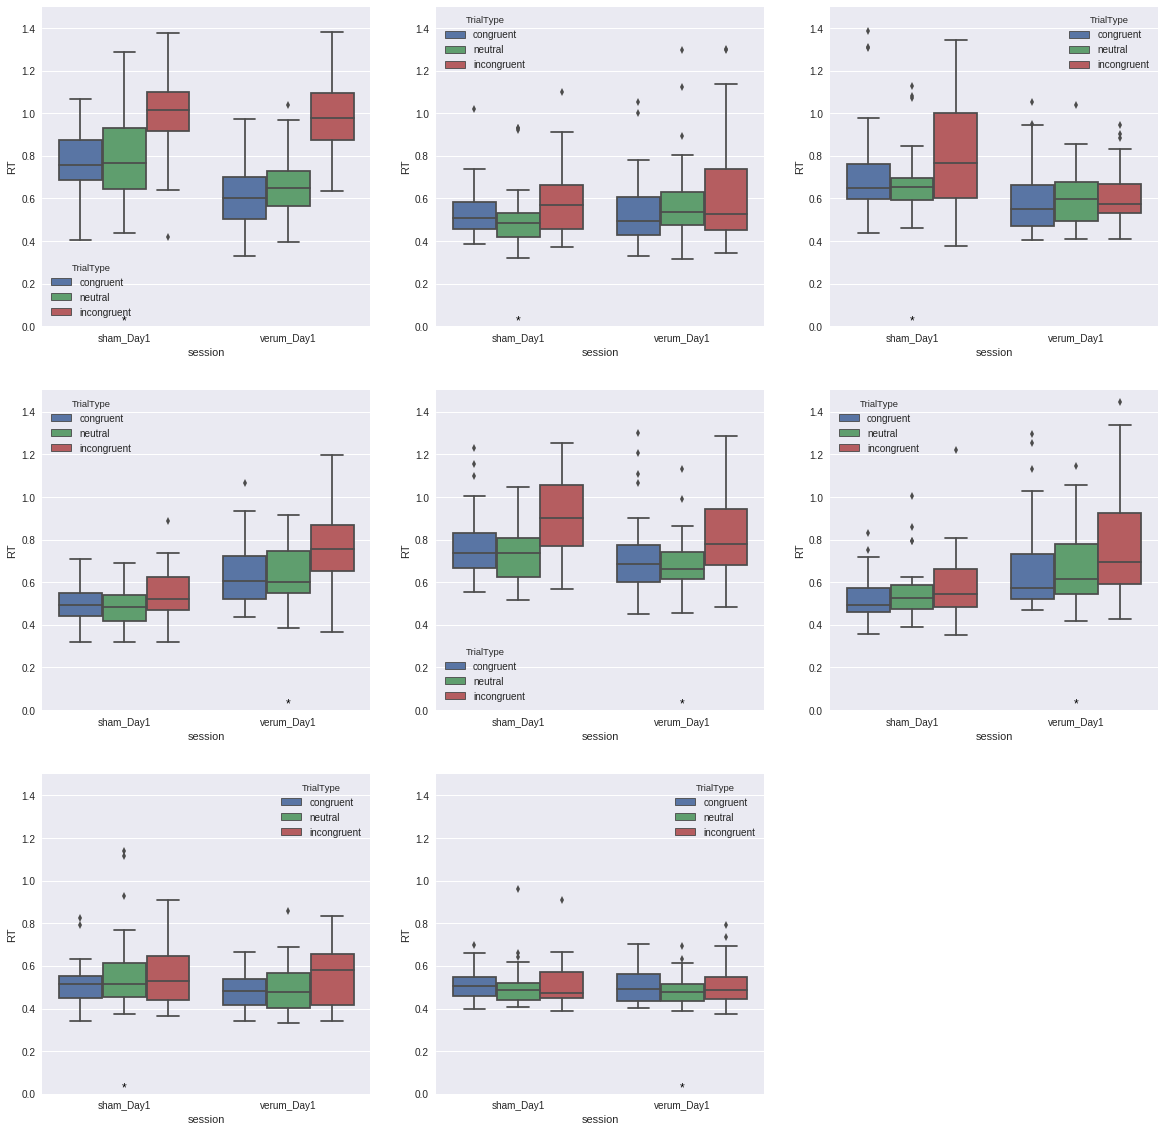

In [117]:
# at which single participant do you want to look at?
NrofParticipants = 8
col = 'black'

    
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)

for i, plot in enumerate([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]):
  WhichParticipant = forlooplist[i]

  plotted = sns.boxplot(x="session", y="RT", hue="TrialType", data = DataFrameComplete.loc[DataFrameComplete.participant == StudyName + '-'+ str(WhichParticipant)], 
            order = ['sham_Day1','verum_Day1'], hue_order = ['congruent','neutral','incongruent'], ax=plot, 
           );

  plotted.set(ylim=(0, 1.5))


# tells us if sham was first or third day
  a = DataFrameComplete.loc[(DataFrameComplete.participant == (StudyName + '-' + str(WhichParticipant))) & (DataFrameComplete.session == 'sham_Day1')].LearningDay.iloc[0]
  print ('sham was measured on day :',  a, '// Participant #',WhichParticipant)

  # put the red * to the left if sham was measured on day 1
  if (a == 1) or (a == 2):
    whichfirstday = 0
  elif (a == 3) or (a == 4):
    whichfirstday = 1
  plot.text(whichfirstday, 0, "*", ha='center', va='bottom', color=col)





plt.show()

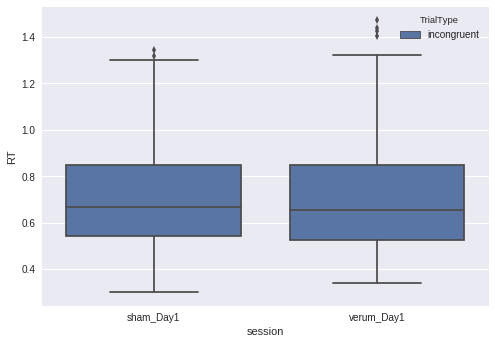

In [58]:
sns.boxplot(x="session", y="RT", hue="TrialType", data=DataFrameComplete, 
            order = ['sham_Day1','verum_Day1'], hue_order = ['incongruent']
           );

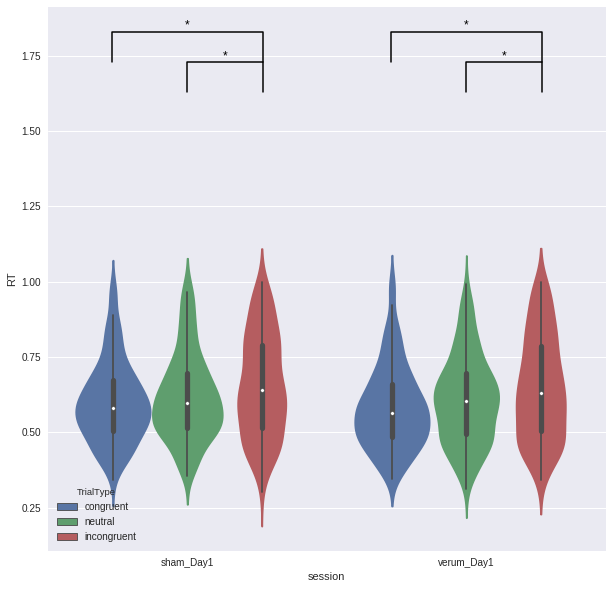

In [59]:
plt.figure(figsize=(10, 10))


seaborn.violinplot(x="session", y = "RT", hue = "TrialType", data = DataFrameComplete.loc[DataFrameComplete.RT < 1], 
                   order = ['sham_Day1','verum_Day1'], hue_order = ['congruent','neutral','incongruent']
                  )








# statistical annotation
# make comparisons
x1, x2 = -0.27, 0.27   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = DataFrameComplete['RT'].max() + 0.25, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

x1, x2 = 0, 0.27   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = DataFrameComplete['RT'].max() + 0.15, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

x1, x2 = -0.27+1, 1.27   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = DataFrameComplete['RT'].max() + 0.25, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

x1, x2 = 1, 1.27   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = DataFrameComplete['RT'].max() + 0.15, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)



plt.show()

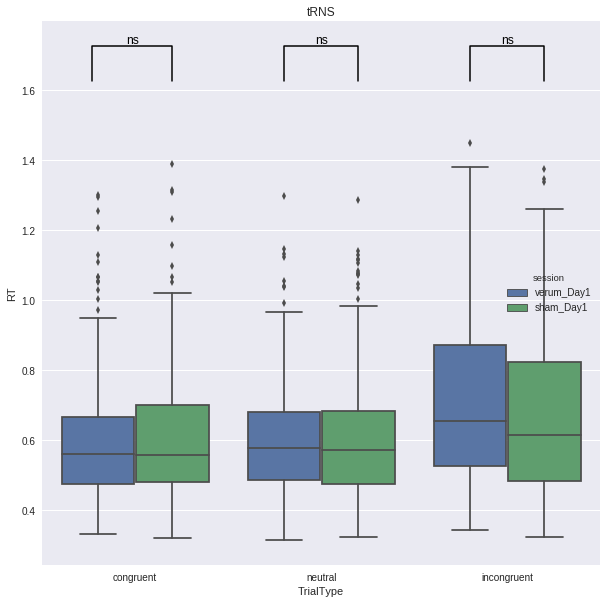

In [119]:
plt.figure(figsize=(10, 10))

if 'STACS' in DataFrameComplete.participant.unique()[0]:
  seaborn.boxplot(x="TrialType", y = "RT", hue = "session", data = DataFrameComplete.loc[(DataFrameComplete.RT < 1.5) & (DataFrameComplete.RT > 0.3)], 
                   order = ['congruent','neutral','incongruent'], hue_order = ['verum_Day1','sham_Day1']
                  ).set_title('tACS')
else:
    seaborn.boxplot(x="TrialType", y = "RT", hue = "session", data = DataFrameComplete.loc[(DataFrameComplete.RT < 1.5) & (DataFrameComplete.RT > 0.3)], 
                   order = ['congruent','neutral','incongruent'], hue_order = ['verum_Day1','sham_Day1']
                  ).set_title('tRNS')     


x1, x2 = 0.8, 1.2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = DataFrameComplete['RT'].max() + 0.15, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

x1, x2 = -0.23, 0.20  # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = DataFrameComplete['RT'].max() + 0.15, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

x1, x2 = 1.8, 2.2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = DataFrameComplete['RT'].max() + 0.15, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)




plt.show()

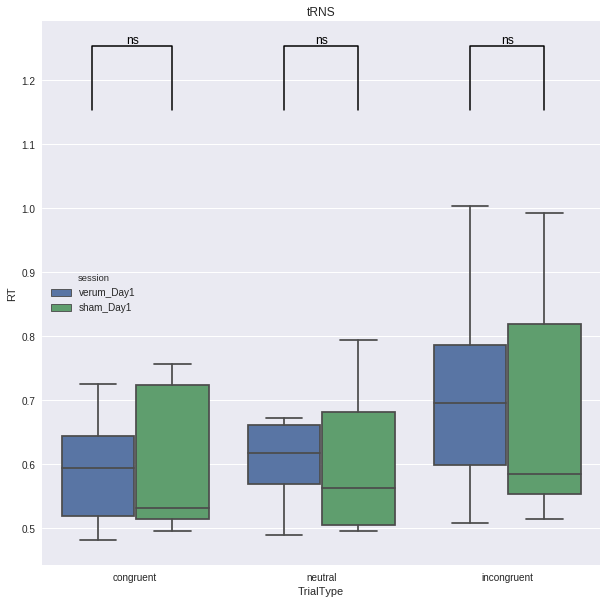

In [132]:
# here the mean value per participant / session / congruency type is computed.
# So there are only as many data points per boxplot as there are participants


# here we make a DataFrame with the mean values
RT = []
session = []
TrialType = []
participant = []
for f in DataFrameComplete.session.unique():
  for j in DataFrameComplete.participant.unique():
    for i in ['congruent', 'incongruent','neutral']:
      RT.append(DataFrameComplete[(DataFrameComplete.TrialType == i) & (DataFrameComplete.Trial_correct == 1.0) & (DataFrameComplete.participant == j) & (DataFrameComplete.session == f)].RT.mean())
      session.append(f)
      TrialType.append(i)
      participant.append(j)
RT = pd.Series(RT)
session = pd.Series(session)
TrialType = pd.Series(TrialType)
participant = pd.Series(participant)


DataFrameDotplot = pd.DataFrame({'RT': RT,
                                 'session': session,
                                 'TrialType': TrialType,
                                 'participant': participant})


# and now we use the new DataFrame to make a figure

plt.figure(figsize=(10, 10))


if 'STACS' in DataFrameDotplot.participant.unique()[0]:
  seaborn.boxplot(x="TrialType", y = "RT", hue = "session", data = DataFrameDotplot.loc[(DataFrameDotplot.RT < 1.5) & (DataFrameDotplot.RT > 0.3)], 
                   order = ['congruent','neutral','incongruent'], hue_order = ['verum_Day1','sham_Day1']
                  ).set_title('tACS')
else:
    seaborn.boxplot(x="TrialType", y = "RT", hue = "session", data = DataFrameDotplot.loc[(DataFrameDotplot.RT < 1.5) & (DataFrameDotplot.RT > 0.3)], 
                   order = ['congruent','neutral','incongruent'], hue_order = ['verum_Day1','sham_Day1']
                  ).set_title('tRNS')     


x1, x2 = 0.8, 1.2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = DataFrameDotplot['RT'].max() + 0.15, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

x1, x2 = -0.23, 0.20  # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = DataFrameDotplot['RT'].max() + 0.15, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

x1, x2 = 1.8, 2.2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = DataFrameDotplot['RT'].max() + 0.15, 0.1, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)




plt.show()

In [131]:
dataverum = []
datasham = []
for j in DataFrameComplete.participant.unique():
  dataverum.append(DataFrameComplete[(DataFrameComplete.TrialType == 'incongruent') & (DataFrameComplete.Trial_correct == 1.0) & (DataFrameComplete.participant == j) & (DataFrameComplete.session == 'verum_Day1')].RT.mean())
  datasham.append(DataFrameComplete[(DataFrameComplete.TrialType == 'incongruent') & (DataFrameComplete.Trial_correct == 1.0) & (DataFrameComplete.participant == j) & (DataFrameComplete.session == 'sham_Day1')].RT.mean())
datasham = np.array(datasham)
dataverum = np.array(dataverum)
print(dataverum)
datasham

[ 1.00301537  0.63172004  0.61600288  0.7817882   0.79931046  0.75890054
  0.54551019  0.50679471]


array([ 0.99117082,  0.59320923,  0.79940063,  0.54451211,  0.87369586,
        0.57519603,  0.55462647,  0.51355911])

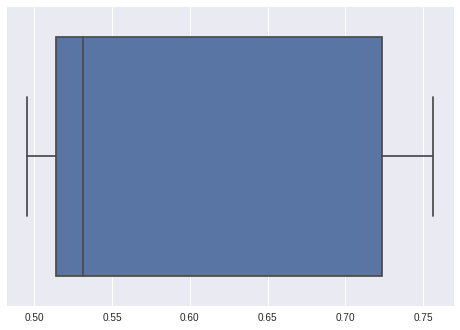

In [127]:
sns.boxplot(datasham)

In [124]:
# permutation test based on Monte Carlo

def exact_mc_perm_test(xs, ys, nmc):
    n, k = len(xs), 0
    diff = np.abs(np.mean(xs) - np.mean(ys))
    zs = np.concatenate([xs, ys])
    for j in range(nmc):
        np.random.shuffle(zs)
        k += diff < np.abs(np.mean(zs[:n]) - np.mean(zs[n:]))
    return k / nmc

exact_mc_perm_test(dataverum, datasham, 30000)

0.85160000000000002

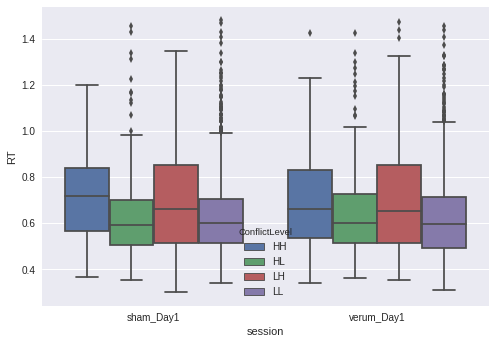

In [62]:
seaborn.boxplot(x="session", y = "RT", hue = "ConflictLevel", data = DataFrameComplete, 
                   order = ['sham_Day1','verum_Day1'], hue_order = ['HH','HL','LH','LL']
                  )

In [63]:
print ("Mean RT across all treatments:"), DataFrameComplete["RT"].mean()
DataFrameComplete.head()

Mean RT across all treatments:


TrialType  RowNum  NofPractice  NofTrial Response  \
13             congruent     8.0          NaN      13.0    right   
14  Neutral_of_congruent    13.0          NaN      14.0     down   
15  Neutral_of_congruent    11.0          NaN      15.0    right   
16             congruent     4.0          NaN      16.0     down   
17  Neutral_of_congruent    14.0          NaN      17.0    right   

    Trial_correct        RT              date     session participant  \
13            1.0  1.189849  2017_Mai_15_1315  verum_Day1    1STACS-1   
14            1.0  0.861219  2017_Mai_15_1315  verum_Day1    1STACS-1   
15            1.0  0.576879  2017_Mai_15_1315  verum_Day1    1STACS-1   
16            1.0  0.563357  2017_Mai_15_1315  verum_Day1    1STACS-1   
17            1.0  0.659370  2017_Mai_15_1315  verum_Day1    1STACS-1   

    ExperimentalBlocks Category_of_Trial ConflictLevel     Datum LearningDay  
13                   1   Congruent_Block            LL  20170515           1  
14                   1   Congruent_Block            LL  20170515           1  
15                   1   Congruent_Block            LL  20170515           1  
16                   1   Congruent_Block            LL  20170515           1  
17                   1   Congruent_Block            LL  20170515           1

In [64]:
# differentes between HL, LL, HH, LH

minuendHL = DataFrameComplete[(DataFrameComplete["TrialType"] == 'Neutral_of_incongruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'HL') 
                  & (DataFrameComplete["session"] == 'verum_Day1')]["RT"].mean()

subtrahendHL = DataFrameComplete[(DataFrameComplete["TrialType"] == 'Neutral_of_incongruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'HL') 
                  & (DataFrameComplete["session"] == 'sham_Day1')]["RT"].mean()
difference = minuendHL - subtrahendHL
print('HL - difference between tacs - sham',difference)

minuendLH = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'LH') 
                  & (DataFrameComplete["session"] == 'verum_Day1')]["RT"].mean()

subtrahendLH = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'LH') 
                  & (DataFrameComplete["session"] == 'sham_Day1')]["RT"].mean()
difference = minuendLH - subtrahendLH
print('LHverumSham',difference)

print('verum stimulation LH',minuendLH)

print('sham stimulation LH',subtrahendLH)

minuendHH = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'HH') 
                  & (DataFrameComplete["session"] == 'verum_Day1')]["RT"].mean()

subtrahendHH = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'HH') 
                  & (DataFrameComplete["session"] == 'sham_Day1')]["RT"].mean()
difference = minuendHH - subtrahendHH
print('HHverumSham',difference)

minuendLL = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'LL') 
                  & (DataFrameComplete["session"] == 'verum_Day1')]["RT"].mean()

subtrahendLL = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent' ) 
                  & (DataFrameComplete["ConflictLevel"] == 'LL') 
                 & (DataFrameComplete["session"] == 'sham_Day1')]["RT"].mean()
difference = minuendLL - subtrahendLL
print('LL - difference between tacs - sham',difference)

print('verum stimulation HH',minuendHH)

print('sham stimulation HH',subtrahendHH)

incongruentVerum = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent')                   
                  & (DataFrameComplete["session"] == 'verum_Day1')]["RT"].mean()

incongruentSham = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent' )  
                  & (DataFrameComplete["session"] == 'sham_Day1')]["RT"].mean()

print ('incongruentVerum', incongruentVerum)
print('incongruentVerum - LH', minuendLH)
print('incongruentVerum - HH', minuendHH)

print ('incongruentSham',incongruentSham)
print('incongruentSham - LH', subtrahendLH)
print('incongruentSham - HH', subtrahendHH)

congruentVerum = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent')                   
                  & (DataFrameComplete["session"] == 'verum_Day1')]["RT"].mean()

congruentSham = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent' )  
                  & (DataFrameComplete["session"] == 'sham_Day1')]["RT"].mean()
print('x')
print ('congruentVerum', congruentVerum)
print('congruentVerum - LL', minuendLL)
print('congruentVerum - HL', minuendHL)

print ('congruentSham',congruentSham)
print('congruentSham - LL', subtrahendLL)
print('congruentSham - HL', subtrahendHL)

#####
congruentVerum = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent' )  
                  & (DataFrameComplete["session"] == 'verum_Day1')]["RT"].mean()

congruentSham = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent' )  
                  & (DataFrameComplete["session"] == 'sham_Day1')]["RT"].mean()

print ('congruentVerum', congruentVerum)
print ('ccongruentSham',congruentSham)


print ('Conflict detection cI - cC: tacs:', minuendLH - minuendLL  ,'sham:' ,subtrahendLH - subtrahendLL)
print ('Conflict adaptation iI - iC: tacs:', minuendHH - minuendHL  ,'sham:' ,subtrahendHH - subtrahendHL)

# congruency sequence effect: [cI - CC]-[iI iC]
print ('congruency sequence effect tacs' , (minuendLH - minuendLL) - (minuendHH - minuendHL))
print ('congruency sequence effect sham' , (subtrahendLH - subtrahendLL) - (subtrahendHH - subtrahendHL))


HL - difference between tacs - sham 0.00647254097315
LHverumSham 0.000328445173449
verum stimulation LH 0.703539692439
sham stimulation LH 0.703211247266
HHverumSham -0.0256915839698
LL - difference between tacs - sham -0.0195198340621
verum stimulation HH 0.693453851114
sham stimulation HH 0.719145435084
incongruentVerum 0.699540744826
incongruentVerum - LH 0.703539692439
incongruentVerum - HH 0.693453851114
incongruentSham 0.709517356932
incongruentSham - LH 0.703211247266
incongruentSham - HH 0.719145435084
x
congruentVerum 0.602370206639
congruentVerum - LL 0.601451988212
congruentVerum - HL 0.643345104386
congruentSham 0.622247832862
congruentSham - LL 0.620971822274
congruentSham - HL 0.636872563412
congruentVerum 0.602370206639
ccongruentSham 0.622247832862
Conflict detection cI - cC: tacs: 0.102087704228 sham: 0.0822394249921
Conflict adaptation iI - iC: tacs: 0.0501087467288 sham: 0.0822728716718
congruency sequence effect tacs 0.0519789574988
congruency sequence effect sham -

In [94]:
DataFrameComplete["RT"].dropna() 
#DataFrameComplete.RT
DataFrameComplete
DataFrameComplete[DataFrameComplete["TrialType"] == 'incongruent']["RT"].mean()
DataFrameComplete[DataFrameComplete["TrialType"] == 'congruent']["RT"].mean()
DataFrameComplete[DataFrameComplete["TrialType"] == 'neutral']["RT"].mean()

0.5888629231296076

In [106]:
print ("Variance =",  
    DataFrameComplete[DataFrameComplete["TrialType"] == 'neutral']["RT"].var())  

Variance = 0.02640159750926228


In [63]:
from pandas import *  
from scipy import stats 

stats.sem(DataFrameComplete[DataFrameComplete["TrialType"] == 'incongruent']["RT"])
DataFrameComplete[DataFrameComplete["TrialType"] == 'incongruent']["RT"].mean()
DataFrameComplete.iloc[1:500,:]

TrialType  RowNum  NofPractice  NofTrial Response  \
14     Neutral_of_congruent    13.0          NaN      14.0     down   
15     Neutral_of_congruent    11.0          NaN      15.0    right   
16                congruent     4.0          NaN      16.0     down   
17     Neutral_of_congruent    14.0          NaN      17.0    right   
18                congruent     4.0          NaN      18.0     down   
19                congruent     8.0          NaN      19.0    right   
20     Neutral_of_congruent    10.0          NaN      20.0     down   
21     Neutral_of_congruent     9.0          NaN      21.0     left   
22                congruent     0.0          NaN      22.0     left   
23                congruent     0.0          NaN      23.0     left   
24     Neutral_of_congruent    12.0          NaN      24.0     left   
25   Neutral_of_incongruent    11.0          NaN      25.0    right   
26              incongruent     2.0          NaN      26.0    right   
27              incongruent     3.0          NaN      27.0     left   
28              incongruent     7.0          NaN      28.0     down   
29              incongruent     5.0          NaN      29.0    right   
30   Neutral_of_incongruent    10.0          NaN      30.0     down   
31              incongruent     6.0          NaN      31.0     left   
32              incongruent     1.0          NaN      32.0     down   
33   Neutral_of_incongruent     9.0          NaN      33.0     left   
34   Neutral_of_incongruent    14.0          NaN      34.0    right   
35   Neutral_of_incongruent    13.0          NaN      35.0     down   
36   Neutral_of_incongruent    12.0          NaN      36.0     left   
37                  neutral    17.0          NaN      37.0    right   
38       Neutral_of_neutral    11.0          NaN      38.0    right   
39                  neutral    19.0          NaN      39.0     down   
40       Neutral_of_neutral    14.0          NaN      40.0    right   
41                  neutral    16.0          NaN      41.0     down   
42       Neutral_of_neutral    10.0          NaN      42.0     down   
43       Neutral_of_neutral    13.0          NaN      43.0     down   
..                      ...     ...          ...       ...      ...   
681      Neutral_of_neutral    12.0          NaN      67.0     left   
682      Neutral_of_neutral    11.0          NaN      68.0    right   
683                 neutral    19.0          NaN      69.0     down   
684                 neutral    15.0          NaN      70.0     left   
685      Neutral_of_neutral    10.0          NaN      71.0     down   
686                 neutral    16.0          NaN      72.0     down   
687                 neutral    20.0          NaN      73.0    right   
688    Neutral_of_congruent    13.0          NaN      74.0     down   
689               congruent     8.0          NaN      75.0    right   
690               congruent     0.0          NaN      76.0     left   
691    Neutral_of_congruent     9.0          NaN      77.0     left   
692               congruent     0.0          NaN      78.0     left   
693               congruent     4.0          NaN      79.0     down   
694    Neutral_of_congruent    12.0          NaN      80.0     left   
695               congruent     4.0          NaN      81.0     down   
696    Neutral_of_congruent    10.0          NaN      82.0     down   
697    Neutral_of_congruent    11.0          NaN      83.0    right   
698    Neutral_of_congruent    14.0          NaN      84.0    right   
699               congruent     8.0          NaN      85.0    right   
700  Neutral_of_incongruent    12.0          NaN      86.0     left   
701             incongruent     5.0          NaN      87.0    right   
702             incongruent     3.0          NaN      88.0     left   
703  Neutral_of_incongruent    13.0          NaN      89.0     down   
704             incongruent     6.0          NaN      90.0     left   
705             incongruent     1.0       

In [64]:
# Mann-Whitney-Wilcoxon (MWW) RankSum test
# Unlike the t-test, the RankSum test does not assume that the data are normally distributed
DataFrameComplete["RT"].dropna()




neutral_A1 = DataFrameComplete[(DataFrameComplete["TrialType"] == 'neutral') & 
                             (DataFrameComplete["session"] == 'verum_Day1') & (DataFrameComplete["RT"].dropna())]["RT"]
neutral_B1 = DataFrameComplete[(DataFrameComplete["TrialType"] == 'neutral') & 
                             (DataFrameComplete["session"] == 'sham_Day1') & (DataFrameComplete["RT"].dropna())]["RT"] 



incongruent_A1 = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent') & 
                             (DataFrameComplete["session"] == 'verum_Day1') & (DataFrameComplete["RT"].dropna())]["RT"]
incongruent_B1 = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent') & 
                             (DataFrameComplete["session"] == 'sham_Day1') & (DataFrameComplete["RT"].dropna())]["RT"] 



congruent_A1 = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent') & 
                             (DataFrameComplete["session"] == 'verum_Day1') & (DataFrameComplete["RT"].dropna())]["RT"]
congruent_B1 = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent') & 
                             (DataFrameComplete["session"] == 'sham_Day1') & (DataFrameComplete["RT"].dropna())]["RT"]  


neutral_A2 = DataFrameComplete[(DataFrameComplete["TrialType"] == 'neutral') & 
                             (DataFrameComplete["session"] == 'verum_Day2') & (DataFrameComplete["RT"].dropna())]["RT"]
neutral_B2 = DataFrameComplete[(DataFrameComplete["TrialType"] == 'neutral') & 
                             (DataFrameComplete["session"] == 'sham_Day2') & (DataFrameComplete["RT"].dropna())]["RT"] 



incongruent_A2 = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent') & 
                             (DataFrameComplete["session"] == 'verum_Day2') & (DataFrameComplete["RT"].dropna())]["RT"]
incongruent_B2 = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent') & 
                             (DataFrameComplete["session"] == 'sham_Day2') & (DataFrameComplete["RT"].dropna())]["RT"] 



congruent_A2 = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent') & 
                             (DataFrameComplete["session"] == 'verum_Day2') & (DataFrameComplete["RT"].dropna())]["RT"]
congruent_B2 = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent') & 
                             (DataFrameComplete["session"] == 'sham_Day2') & (DataFrameComplete["RT"].dropna())]["RT"]  





f_val, p_val = stats.f_oneway(neutral_A1, incongruent_A1, congruent_A1)  
  
#print ("One-way ANOVA P =", p_val)  


# non parametric version of anova:

stats.kruskal(neutral_A1, incongruent_A1, congruent_A1, neutral_B1, incongruent_B1, congruent_B1)

#Or one could use the Mann-Whitney test on each pair of groups and adjust the p value with 
#the Bonferroni method, but that is rather overcautious and one might miss a sig result. 

z_stat, p_val = stats.ranksums(neutral_B1, neutral_A1)  
  
#print ("MWW RankSum P for treatments 1 and 2 =", p_val)  
#...


print(scipy.stats.ttest_ind(neutral_A1, neutral_B1))

print(scipy.stats.ttest_ind(congruent_A1, congruent_B1))

print(scipy.stats.ttest_ind(incongruent_A1, incongruent_B1))


print(scipy.stats.ttest_ind(neutral_A2, neutral_B2))

print(scipy.stats.ttest_ind(congruent_A2, congruent_B2))

print(scipy.stats.ttest_ind(incongruent_A2, incongruent_B2))


f_val, p_val = stats.f_oneway(neutral_B1, congruent_B1, incongruent_B1)  

print ("One-way ANOVA P =", p_val)

print (scipy.stats.ttest_ind(congruent_A1, neutral_A1))

print (scipy.stats.ttest_ind(congruent_A1, incongruent_A1))

print (scipy.stats.ttest_ind(neutral_A1, incongruent_A1))


# compare first with second day


print(scipy.stats.ttest_ind(neutral_A1, neutral_A2))

print(scipy.stats.ttest_ind(congruent_A1, congruent_A2))

print(scipy.stats.ttest_ind(incongruent_A1, incongruent_A2))


print(scipy.stats.ttest_ind(neutral_B1, neutral_B2))

print(scipy.stats.ttest_ind(congruent_B1, congruent_B2))

print(scipy.stats.ttest_ind(incongruent_B1, incongruent_B2))






Ttest_indResult(statistic=0.026026670677749903, pvalue=0.97924515867635997)
Ttest_indResult(statistic=-1.3684139835472824, pvalue=0.17172069970428835)
Ttest_indResult(statistic=-0.53240508998762426, pvalue=0.59465439624463245)
Ttest_indResult(statistic=-0.35345515096625479, pvalue=0.72387702219769134)
Ttest_indResult(statistic=-0.39561365697897966, pvalue=0.69253730966645022)
Ttest_indResult(statistic=-3.282982771476096, pvalue=0.0010901639048944466)
One-way ANOVA P = 3.40800859282e-08
Ttest_indResult(statistic=-2.2253697789817877, pvalue=0.026446213881198128)
Ttest_indResult(statistic=-5.793172964026887, pvalue=1.1429558348286129e-08)
Ttest_indResult(statistic=-3.6830587517878306, pvalue=0.00025243030857012788)
Ttest_indResult(statistic=2.739820322163439, pvalue=0.0063391470282040995)
Ttest_indResult(statistic=2.7148533761773113, pvalue=0.0068307026026714606)
Ttest_indResult(statistic=4.2610147468619308, pvalue=2.3808560891545716e-05)
Ttest_indResult(statistic=2.3792193728046831, pval

In [ ]:
# Anova should be used: Repeated measures two way ANOVA!
# R Method!!!!!

#%Rpush neutral_A1 incongruent_A1 congruent_A1


#label the conditions
#%R Factor <- c('neutral','incongruent','congruent')
#create a vector of conditions
#%R idata <- data.frame(Factor)

#combine data into single matrix
#%R Bind <- cbind(neutral_A1,incongruent_A1,congruent_A1)
#generate linear model
#%R model <- lm(Bind~1)

#load the car library. note this library must be installed.
# %R library(car)
#run anova
#%R analysis <- aov(model,idata=idata,idesign=~Factor,type="III")
#create anova summary table
#%R anova_sum = summary(analysis)

#move the data from R to python
#%Rpull anova_sum

#print (anova_sum)

# make all the comparisons
#.....




#df.box_plot('rt', factors=['iv1', 'iv2'])

In [65]:
pandas.isnull(neutral)
#print(incongruent_A1)
a = list(neutral_A1)
b = list(incongruent_A1)
c = list(congruent_A1)
stats.kruskal (a,b,c)

NameError: name 'neutral' is not defined

In [110]:
for i in range(0,len(a)):
    if math.isnan(a[i]):
        print (i)
        print('Nan')

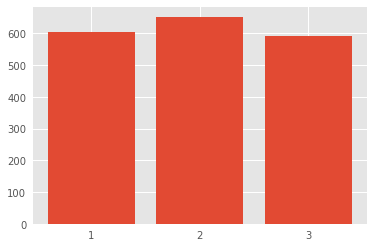

In [44]:
import random

random.seed(1) #seed random number generator
cond_1 = [random.gauss(600,30) for x in range(30)] #condition 1 has a mean of 600 and standard deviation of 30
cond_2 = [random.gauss(650,30) for x in range(30)] #u=650 and sd=30
cond_3 = [random.gauss(600,30) for x in range(30)] #u=600 and sd=30

plt.bar(np.arange(1,4),[np.mean(cond_1),np.mean(cond_2),np.mean(cond_3)],align='center') #plot data
plt.xticks([1,2,3]);


In [47]:
%Rpush cond_1 cond_2 cond_3
%R Factor <- c('Cond1','Cond2','Cond3')
%R Factor

array(['Cond1', 'Cond2', 'Cond3'], 
      dtype='<U5')

In [30]:
DataFrameComplete.ExperimentalBlocks

13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        2
26        2
27        2
28        2
29        2
30        2
31        2
32        2
33        2
34        2
35        2
36        2
37        3
38        3
39        3
40        3
41        3
42        3
       ... 
9781    796
9782    796
9783    796
9784    796
9785    796
9786    796
9787    797
9788    797
9789    797
9790    797
9791    797
9792    797
9793    797
9794    797
9795    797
9796    797
9797    797
9798    797
9799    798
9800    798
9801    798
9802    798
9803    798
9804    798
9805    798
9806    798
9807    798
9808    798
9809    798
9810    798
Name: ExperimentalBlocks, Length: 6886, dtype: int64

In [68]:
#Analyze either day 1 or day 2
# put to 1 for analyzing day 1

AnalyzeDay = 1 

if AnalyzeDay == 1: 

    DataFrameCompleteForExport = DataFrameComplete.loc[(DataFrameComplete.Category_of_Trial != 'Fix_Block') &
                                                      (DataFrameComplete.session != 'verum_Day2') & (DataFrameComplete.session != 'sham_Day2' )]
    
elif AnalyzeDay == 2:
   DataFrameCompleteForExport = DataFrameComplete.loc[(DataFrameComplete.Category_of_Trial != 'Fix_Block') &
                                                      (DataFrameComplete.session != 'verum_Day1') & (DataFrameComplete.session != 'sham_Day1' )]   
    

DataFrameCompleteForExport.to_csv(StudyName+'_Day_'+ str(AnalyzeDay) + '.csv')


print(len(DataFrameCompleteForExport))

print(len(DataFrameCompleteForExport[np.isnan(DataFrameCompleteForExport['RT'])]))

DataFrameComplete.head()

3437
0


TrialType  RowNum  NofPractice  NofTrial Response  \
13             congruent     8.0          NaN      13.0    right   
14  Neutral_of_congruent    13.0          NaN      14.0     down   
15  Neutral_of_congruent    11.0          NaN      15.0    right   
16             congruent     4.0          NaN      16.0     down   
17  Neutral_of_congruent    14.0          NaN      17.0    right   

    Trial_correct        RT              date     session participant  \
13            1.0  1.189849  2017_Mai_15_1315  verum_Day1    1STACS-1   
14            1.0  0.861219  2017_Mai_15_1315  verum_Day1    1STACS-1   
15            1.0  0.576879  2017_Mai_15_1315  verum_Day1    1STACS-1   
16            1.0  0.563357  2017_Mai_15_1315  verum_Day1    1STACS-1   
17            1.0  0.659370  2017_Mai_15_1315  verum_Day1    1STACS-1   

    ExperimentalBlocks Category_of_Trial ConflictLevel     Datum LearningDay  
13                   1   Congruent_Block            LL  20170515           1  
14                   1   Congruent_Block            LL  20170515           1  
15                   1   Congruent_Block            LL  20170515           1  
16                   1   Congruent_Block            LL  20170515           1  
17                   1   Congruent_Block            LL  20170515           1

In [61]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

from rpy2.robjects.packages import importr

base = importr('base')
# call an R function on a Pandas DataFrame
base.summary(DataFrameComplete)

ModuleNotFoundError: No module named 'rpy2'

In [52]:
# control if the colours were all of similar speed:

DataFrameComplete.loc[DataFrameComplete.RowNum == 0.0, 'RowNum'] = 'RED'           
DataFrameComplete.loc[DataFrameComplete.RowNum == 3.0, 'RowNum'] = 'RED'
DataFrameComplete.loc[DataFrameComplete.RowNum == 6.0, 'RowNum'] = 'RED'
DataFrameComplete.loc[DataFrameComplete.RowNum == 9.0, 'RowNum'] = 'RED'
DataFrameComplete.loc[DataFrameComplete.RowNum == 13.0, 'RowNum'] = 'RED'
DataFrameComplete.loc[DataFrameComplete.RowNum == 15.0, 'RowNum'] = 'RED'
DataFrameComplete.loc[DataFrameComplete.RowNum == 18.0, 'RowNum'] = 'RED'


DataFrameComplete.loc[DataFrameComplete.RowNum == 1.0, 'RowNum'] = 'GREEN'
DataFrameComplete.loc[DataFrameComplete.RowNum == 4.0, 'RowNum'] = 'GREEN'
DataFrameComplete.loc[DataFrameComplete.RowNum == 7.0, 'RowNum'] = 'GREEN'
DataFrameComplete.loc[DataFrameComplete.RowNum == 10.0, 'RowNum'] = 'GREEN'
DataFrameComplete.loc[DataFrameComplete.RowNum == 13.0, 'RowNum'] = 'GREEN'
DataFrameComplete.loc[DataFrameComplete.RowNum == 16.0, 'RowNum'] = 'GREEN'
DataFrameComplete.loc[DataFrameComplete.RowNum == 19.0, 'RowNum'] = 'GREEN'

DataFrameComplete.loc[DataFrameComplete.RowNum == 2.0, 'RowNum'] = 'BLUE'
DataFrameComplete.loc[DataFrameComplete.RowNum == 5.0, 'RowNum'] = 'BLUE'
DataFrameComplete.loc[DataFrameComplete.RowNum == 8.0, 'RowNum'] = 'BLUE'
DataFrameComplete.loc[DataFrameComplete.RowNum == 11.0, 'RowNum'] = 'BLUE'
DataFrameComplete.loc[DataFrameComplete.RowNum == 14.0, 'RowNum'] = 'BLUE'
DataFrameComplete.loc[DataFrameComplete.RowNum == 17.0, 'RowNum'] = 'BLUE'
DataFrameComplete.loc[DataFrameComplete.RowNum == 17.0, 'RowNum'] = 'BLUE'

DataFrameComplete.head()

TrialType RowNum  NofPractice  NofTrial Response  \
13             congruent   BLUE          NaN      13.0    right   
14  Neutral_of_congruent    RED          NaN      14.0     down   
15  Neutral_of_congruent   BLUE          NaN      15.0    right   
16             congruent  GREEN          NaN      16.0     down   
17  Neutral_of_congruent   BLUE          NaN      17.0    right   

    Trial_correct        RT              date     session participant  \
13            1.0  1.189849  2017_Mai_15_1315  verum_Day1    1STACS-1   
14            1.0  0.861219  2017_Mai_15_1315  verum_Day1    1STACS-1   
15            1.0  0.576879  2017_Mai_15_1315  verum_Day1    1STACS-1   
16            1.0  0.563357  2017_Mai_15_1315  verum_Day1    1STACS-1   
17            1.0  0.659370  2017_Mai_15_1315  verum_Day1    1STACS-1   

    ExperimentalBlocks Category_of_Trial ConflictLevel     Datum LearningDay  
13                   1   Congruent_Block            LL  20170515           1  
14                   1   Congruent_Block            LL  20170515           1  
15                   1   Congruent_Block            LL  20170515           1  
16                   1   Congruent_Block            LL  20170515           1  
17                   1   Congruent_Block            LL  20170515           1

In [63]:
print(DataFrameComplete[(DataFrameComplete.RowNum == 'RED') & (DataFrameComplete.participant == '1STACS-8')]['RT'].mean())
print(DataFrameComplete[(DataFrameComplete.RowNum == 'GREEN') & (DataFrameComplete.participant == '1STACS-8')]['RT'].mean())
print(DataFrameComplete[(DataFrameComplete.RowNum == 'BLUE') & (DataFrameComplete.participant == '1STACS-8')]['RT'].mean())
# in the end it seems to go all to the same values.

0.669437534581
0.606584150748
0.716847419042


In [23]:
#Creating a list
my_numbers = []
r = range(5)
for i in r:
    try:
        my_numbers.append(int(input("Enter a number: ")))
    except:
        print( 'You must enter an integer' )
        r.append(i)

Enter a number: 1
Enter a number: 2
Enter a number: 3
Enter a number: 4
Enter a number: 5


In [24]:
sum(map(int, my_numbers))

15

In [77]:
DataFrameComplete

TrialType  RowNum  NofPractice  NofTrial Response  \
13                 congruent     8.0          NaN      13.0    right   
14      Neutral_of_congruent    13.0          NaN      14.0     down   
15      Neutral_of_congruent    11.0          NaN      15.0    right   
16                 congruent     4.0          NaN      16.0     down   
17      Neutral_of_congruent    14.0          NaN      17.0    right   
18                 congruent     4.0          NaN      18.0     down   
19                 congruent     8.0          NaN      19.0    right   
20      Neutral_of_congruent    10.0          NaN      20.0     down   
21      Neutral_of_congruent     9.0          NaN      21.0     left   
22                 congruent     0.0          NaN      22.0     left   
23                 congruent     0.0          NaN      23.0     left   
24      Neutral_of_congruent    12.0          NaN      24.0     left   
25    Neutral_of_incongruent    11.0          NaN      25.0    right   
26               incongruent     2.0          NaN      26.0    right   
27               incongruent     3.0          NaN      27.0     left   
28               incongruent     7.0          NaN      28.0     down   
29               incongruent     5.0          NaN      29.0    right   
30    Neutral_of_incongruent    10.0          NaN      30.0     down   
31               incongruent     6.0          NaN      31.0     left   
32               incongruent     1.0          NaN      32.0     down   
33    Neutral_of_incongruent     9.0          NaN      33.0     left   
34    Neutral_of_incongruent    14.0          NaN      34.0    right   
35    Neutral_of_incongruent    13.0          NaN      35.0     down   
36    Neutral_of_incongruent    12.0          NaN      36.0     left   
37                   neutral    17.0          NaN      37.0    right   
38        Neutral_of_neutral    11.0          NaN      38.0    right   
39                   neutral    19.0          NaN      39.0     down   
40        Neutral_of_neutral    14.0          NaN      40.0    right   
41                   neutral    16.0          NaN      41.0     down   
42        Neutral_of_neutral    10.0          NaN      42.0     down   
...                      ...     ...          ...       ...      ...   
9781             incongruent     6.0          NaN     264.0     left   
9782             incongruent     5.0          NaN     265.0    right   
9783  Neutral_of_incongruent     9.0          NaN     266.0     left   
9784             incongruent     3.0          NaN     267.0     left   
9785  Neutral_of_incongruent    11.0          NaN     268.0     down   
9786             incongruent     1.0          NaN     269.0     down   
9787                 neutral    18.0          NaN     270.0     left   
9788                 neutral    15.0          NaN     271.0     left   
9789      Neutral_of_neutral     9.0          NaN     272.0     left   
9790                 neutral    16.0          NaN     273.0     down   
9791      Neutral_of_neutral    11.0          NaN     274.0    right   
9792      Neutral_of_neutral    13.0          NaN     275.0     down   
9793                 neutral    17.0          NaN     276.0    right   
9794      Neutral_of_neutral    14.0          NaN     277.0    right   
9795                 neutral    20.0          NaN     278.0    right   
9796      Neutral_of_neutral    12.0          NaN     279.0     left   
9797                 neutral    19.0          NaN     280.0     down   
9798      Neutral_of_neutral    10.0          NaN     281.0     down   
9799               congruent     8.0          NaN     282.0    right   
9800    Neutral_of_congruent    12.0          NaN     283.0     left   
9801               congruent     0.0          NaN     284.0     left   
9802               congruent     0.0          NaN     285.0     left   
9803    Neutral_of_congruent     9.0          NaN     286.0     left   
9804    Neutral_of_congruent    13.0          NaN     287.0

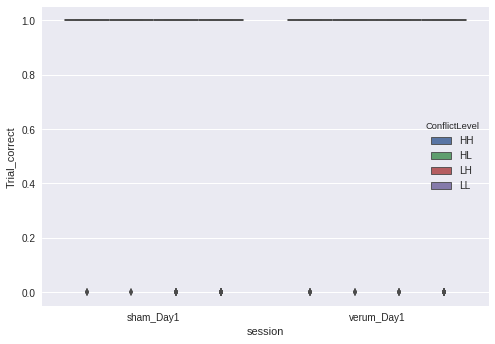

In [81]:
seaborn.boxplot(x="session", y = "Trial_correct", hue = "ConflictLevel", data = DataFrameComplete, 
                   order = ['sham_Day1','verum_Day1'], hue_order = ['HH','HL','LH','LL']
                  )

In [102]:
congruentSham = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent' )  
                  & (DataFrameComplete["session"] == 'sham_Day1')]["Trial_correct"].mean()
print('congruentSham', congruentSham)
congruentVerum = DataFrameComplete[(DataFrameComplete["TrialType"] == 'congruent' )  
                  & (DataFrameComplete["session"] == 'verum_Day1')]["Trial_correct"].mean()
print('congruentVerum', congruentVerum)

incongruentSham = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent' )  
                  & (DataFrameComplete["session"] == 'sham_Day1')]["Trial_correct"].mean()
print('incongruentSham', incongruentSham)
incongruentVerum = DataFrameComplete[(DataFrameComplete["TrialType"] == 'incongruent' )  
                  & (DataFrameComplete["session"] == 'verum_Day1')]["Trial_correct"].mean()
print('incongruentVerum', incongruentVerum)



congruentSham 0.979020979021
congruentVerum 0.979094076655
incongruentSham 0.957597173145
incongruentVerum 0.961403508772
